In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
import matplotlib.pyplot as plt

if os.name == 'posix':
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")

In [3]:
df_org = pd.read_csv('./train.csv')
df_org

,id,신고번호,신고일자,신고세관부호,수입신고구분코드,수입거래구분코드,수입종류코드,징수형태코드,운송수단유형코드,신고인부호,...,HS10단위부호,적출국가코드,원산지국가코드,관세율,관세율구분코드,원산지표시유무코드,신고중량(KG),과세가격원화금액,우범여부,핵심적발
0,0,97061800,2020-01-01,30,B,11,21,11,10,ZZR1LT6,...,4408909195,BE,BE,0.0,FEU1,G,108.0,372254.40,0,0
1,1,85945189,2020-01-01,40,B,11,21,11,40,SWF9S4X,...,6907221000,CN,CN,8.0,A,Y,11352.0,375751.20,0,0
2,2,77854751,2020-01-01,20,B,11,21,11,40,X4XT6P8,...,6208221000,CN,CN,5.2,FCN1,B,20.7,5353.02,0,0
3,3,46925060,2020-01-01,40,B,11,21,43,40,K7LCQTZ,...,9403501000,VN,VN,0.0,C,Y,9218.0,1477645.40,0,0
4,4,34131149,2020-01-01,20,B,11,21,11,10,1HMVIVH,...,710807000,VN,VN,27.0,A,B,24000.0,6364800.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37380,37380,78236084,2020-12-31,40,B,11,21,43,40,NZYZ967,...,3926909000,CN,CN,6.5,C,Y,573.0,343.80,1,1
37381,37381,13057608,2020-12-31,20,B,93,31,43,10,RSUWWQ2,...,4016999000,CN,CN,4.8,FCN1,G,1938.0,35077.80,1,1
37382,37382,32316450,2020-12-31,40,B,11,21,11,10,ZOAPZF5,...,8504405090,CN,CN,4.9,CIT,S,50.0,3105.00,0,0
37383,37383,62223974,2020-12-31,20,B,11,21,11,40,09EO87L,...,7204210000,CA,CA,0.0,A,B,20502.0,311630.40,0,0


In [4]:
df_org.shape
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37385 entries, 0 to 37384
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         37385 non-null  int64  
 1   신고번호       37385 non-null  int64  
 2   신고일자       37385 non-null  object 
 3   신고세관부호     37385 non-null  int64  
 4   수입신고구분코드   37385 non-null  object 
 5   수입거래구분코드   37385 non-null  int64  
 6   수입종류코드     37385 non-null  int64  
 7   징수형태코드     37385 non-null  int64  
 8   운송수단유형코드   37385 non-null  int64  
 9   신고인부호      37385 non-null  object 
 10  수입자        37385 non-null  object 
 11  해외거래처부호    33670 non-null  object 
 12  특송업체부호     6714 non-null   object 
 13  HS10단위부호   37385 non-null  int64  
 14  적출국가코드     37385 non-null  object 
 15  원산지국가코드    37385 non-null  object 
 16  관세율        37385 non-null  float64
 17  관세율구분코드    37385 non-null  object 
 18  원산지표시유무코드  37385 non-null  object 
 19  신고중량(KG)   37385 non-null  float64
 20  과세가격원화

In [5]:
# 테스트 1 (8/2)
del df_org['id']
del df_org['신고번호']
del df_org['신고일자']
del df_org['수입자']
del df_org['신고인부호']
del df_org['해외거래처부호']
# 테스트 2 (8/3)
del df_org['수입신고구분코드']
del df_org['수입종류코드']
del df_org['운송수단유형코드']
# 테스트 3 (8/4)
del df_org['수입거래구분코드']
del df_org['특송업체부호']

In [6]:
# discrete_columns = ['신고세관부호', '수입신고구분코드', '수입거래구분코드', '수입종류코드', '징수형태코드', '운송수단유형코드', '특송업체부호', 'HS10단위부호', '적출국가코드', '원산지국가코드', '관세율구분코드', '원산지표시유무코드']

# for var in discrete_columns:
#     df_org[var] = df_org[var].astype(str)

In [7]:
# right skewed 현상 완화
# numeric_columns = ['신고중량(KG)', '과세가격원화금액', '관세율']

# for var in ['신고중량(KG)', '과세가격원화금액']:
#     df_org[var] = df_org[var].apply(lambda x: np.log1p(x))

In [8]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37385 entries, 0 to 37384
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   신고세관부호     37385 non-null  int64  
 1   징수형태코드     37385 non-null  int64  
 2   HS10단위부호   37385 non-null  int64  
 3   적출국가코드     37385 non-null  object 
 4   원산지국가코드    37385 non-null  object 
 5   관세율        37385 non-null  float64
 6   관세율구분코드    37385 non-null  object 
 7   원산지표시유무코드  37385 non-null  object 
 8   신고중량(KG)   37385 non-null  float64
 9   과세가격원화금액   37385 non-null  float64
 10  우범여부       37385 non-null  int64  
 11  핵심적발       37385 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.4+ MB


In [9]:
df_org.sample(5)

,신고세관부호,징수형태코드,HS10단위부호,적출국가코드,원산지국가코드,관세율,관세율구분코드,원산지표시유무코드,신고중량(KG),과세가격원화금액,우범여부,핵심적발
13619,40,43,2106909099,US,US,0.0,FUS1,G,105.3,13320.45,0,0
17151,40,11,9503003919,US,CN,8.0,A,E,3.2,214.08,0,0
22539,40,11,4602199000,BD,BD,0.0,R,Y,305.0,296277.00,0,0
3044,40,11,3926909000,CN,CN,3.9,FCN1,E,1556.0,933.60,0,0
31019,40,11,7113203000,HK,CN,8.0,A,S,6.0,1385251.80,0,0


In [10]:
df_org['우범여부'].value_counts()

0    29271
1     8114
Name: 우범여부, dtype: int64

In [11]:
df_org['핵심적발'].value_counts()

0    29271
1     7720
2      394
Name: 핵심적발, dtype: int64

In [12]:
df_org

,신고세관부호,징수형태코드,HS10단위부호,적출국가코드,원산지국가코드,관세율,관세율구분코드,원산지표시유무코드,신고중량(KG),과세가격원화금액,우범여부,핵심적발
0,30,11,4408909195,BE,BE,0.0,FEU1,G,108.0,372254.40,0,0
1,40,11,6907221000,CN,CN,8.0,A,Y,11352.0,375751.20,0,0
2,20,11,6208221000,CN,CN,5.2,FCN1,B,20.7,5353.02,0,0
3,40,43,9403501000,VN,VN,0.0,C,Y,9218.0,1477645.40,0,0
4,20,11,710807000,VN,VN,27.0,A,B,24000.0,6364800.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
37380,40,43,3926909000,CN,CN,6.5,C,Y,573.0,343.80,1,1
37381,20,43,4016999000,CN,CN,4.8,FCN1,G,1938.0,35077.80,1,1
37382,40,11,8504405090,CN,CN,4.9,CIT,S,50.0,3105.00,0,0
37383,20,11,7204210000,CA,CA,0.0,A,B,20502.0,311630.40,0,0


In [13]:
df_public = pd.read_csv('./public.csv')

public_result = pd.DataFrame()
public_result['신고번호'] = df_public['신고번호']

# 테스트 1 (8/2)
del df_public['id']
del df_public['신고번호']
del df_public['신고일자']
del df_public['수입자']
del df_public['신고인부호']
del df_public['해외거래처부호']
# 테스트 2 (8/3)
del df_public['수입신고구분코드']
del df_public['수입종류코드']
del df_public['운송수단유형코드']
# 테스트 3 (8/4)
del df_public['수입거래구분코드']
del df_public['특송업체부호']

In [14]:
df_public

,신고세관부호,징수형태코드,HS10단위부호,적출국가코드,원산지국가코드,관세율,관세율구분코드,원산지표시유무코드,신고중량(KG),과세가격원화금액
0,40,11,7607119000,CN,CN,7.2,FCN1,E,901.2,415092.72
1,20,11,3215909000,HK,CN,0.0,FCN1,E,400.0,30520.00
2,30,14,6505009090,CN,CN,3.2,FCN1,S,339.0,2610.30
3,20,11,6208921000,CN,CN,13.0,A,E,30.0,2478.00
4,16,11,9031809070,US,US,1.3,CIT,B,3.0,86125.20
...,...,...,...,...,...,...,...,...,...,...
8129,40,11,4202922000,CN,CN,4.8,FCN1,S,930.0,55335.00
8130,30,11,3825900000,KR,KR,6.5,C,S,5430.0,28236.00
8131,20,11,9018909090,JP,KR,8.0,A,G,93.5,4703.05
8132,40,18,6203429000,MY,MY,0.0,FAS1,E,717.0,197461.80


In [15]:
df_private = pd.read_csv('./private.csv')

private_result = pd.DataFrame()
private_result['신고번호'] = df_private['신고번호']

# 테스트 1 (8/2)
del df_private['id']
del df_private['신고번호']
del df_private['신고일자']
del df_private['수입자']
del df_private['신고인부호']
del df_private['해외거래처부호']
# 테스트 2 (8/3)
del df_private['수입신고구분코드']
del df_private['수입종류코드']
del df_private['운송수단유형코드']
# 테스트 3 (8/4)
del df_private['수입거래구분코드']
del df_private['특송업체부호']

In [16]:
df_private

,신고세관부호,징수형태코드,HS10단위부호,적출국가코드,원산지국가코드,관세율,관세율구분코드,원산지표시유무코드,신고중량(KG),과세가격원화금액
0,40,11,4202311090,IT,RO,8.0,A,G,1.0,1.248700e+03
1,20,11,7113110000,TH,TH,8.0,A,Y,4.7,1.365350e+03
2,40,11,3906909000,CN,CN,2.4,FCN1,G,19000.0,1.105800e+06
3,62,43,3926909000,CN,CN,6.5,C,G,275.0,1.650000e+02
4,40,11,8713900000,CN,CN,0.0,C,E,42.0,1.139376e+05
...,...,...,...,...,...,...,...,...,...,...
8476,40,18,8443991000,SG,CN,0.0,C,Y,2.2,1.463000e+02
8477,40,11,9603290000,CN,CN,3.2,FCN1,B,121.2,3.842040e+03
8478,33,11,307493090,CN,CN,12.0,FCN1,Y,21450.0,1.186078e+08
8479,20,11,8517623390,CN,CN,0.0,C,B,25.4,6.910349e+05


In [17]:
from sklearn.preprocessing import LabelEncoder

df_encode = pd.concat([df_public, df_private, df_org.iloc[:,:-2]], axis=0)
df_encode = df_encode.drop(['관세율', '신고중량(KG)', '과세가격원화금액'], axis=1)

df_encode

,신고세관부호,징수형태코드,HS10단위부호,적출국가코드,원산지국가코드,관세율구분코드,원산지표시유무코드
0,40,11,7607119000,CN,CN,FCN1,E
1,20,11,3215909000,HK,CN,FCN1,E
2,30,14,6505009090,CN,CN,FCN1,S
3,20,11,6208921000,CN,CN,A,E
4,16,11,9031809070,US,US,CIT,B
...,...,...,...,...,...,...,...
37380,40,43,3926909000,CN,CN,C,Y
37381,20,43,4016999000,CN,CN,FCN1,G
37382,40,11,8504405090,CN,CN,CIT,S
37383,20,11,7204210000,CA,CA,A,B


In [18]:
encoder = LabelEncoder()
df_encode.loc[:,:] = \
df_encode.loc[:,:].apply(encoder.fit_transform)

df_public_label = df_encode.iloc[:8134, :]
df_public_label = pd.concat([df_public_label, df_public.loc[:,['관세율', '신고중량(KG)', '과세가격원화금액']]], axis=1)
df_private_label = df_encode.iloc[8134:16615, :]
df_private_label = pd.concat([df_private_label, df_private.loc[:,['관세율', '신고중량(KG)', '과세가격원화금액']]], axis=1)
df_label = df_encode.iloc[16615:, :]
df_label = pd.concat([df_label, df_org.loc[:,['관세율', '신고중량(KG)', '과세가격원화금액', '우범여부', '핵심적발']]], axis=1)

In [19]:
for var in ['신고중량(KG)', '과세가격원화금액']:
    df_label[var] = df_label[var].apply(lambda x: np.log1p(x))
    df_public_label[var] = df_public_label[var].apply(lambda x: np.log1p(x))
    df_private_label[var] = df_private_label[var].apply(lambda x: np.log1p(x))

In [20]:
df_label

,신고세관부호,징수형태코드,HS10단위부호,적출국가코드,원산지국가코드,관세율구분코드,원산지표시유무코드,관세율,신고중량(KG),과세가격원화금액,우범여부,핵심적발
0,9,2,1221,7,8,26,2,0.0,4.691348,12.827335,0,0
1,13,2,1918,15,19,0,5,8.0,9.337237,12.836685,0,0
2,6,2,1732,15,19,18,0,5.2,3.077312,8.585603,0,0
3,13,9,3406,98,114,1,5,0.0,9.129022,14.205961,0,0
4,6,2,141,98,114,0,0,27.0,10.085851,15.666294,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
37380,13,9,1075,15,19,1,5,6.5,6.352629,5.842965,1,1
37381,6,9,1124,15,19,18,2,4.8,7.569928,10.465352,1,1
37382,13,2,2747,15,19,5,4,4.9,3.931826,8.041091,0,0
37383,6,2,2035,12,15,0,0,0.0,9.928326,12.649576,0,0


In [21]:
df_public_label

,신고세관부호,징수형태코드,HS10단위부호,적출국가코드,원산지국가코드,관세율구분코드,원산지표시유무코드,관세율,신고중량(KG),과세가격원화금액
0,13,2,2190,15,19,18,1,7.2,6.804836,12.936260
1,6,2,786,37,19,18,1,0.0,5.993961,10.326170
2,9,5,1851,15,19,18,4,3.2,5.828946,7.867603
3,6,2,1736,15,19,0,1,13.0,3.433987,7.815611
4,4,2,3308,95,111,5,0,1.3,1.386294,11.363569
...,...,...,...,...,...,...,...,...,...,...
8129,13,2,1165,15,19,18,4,4.8,6.836259,10.921179
8130,9,2,948,50,55,1,4,6.5,8.599879,10.248388
8131,6,2,3234,47,55,0,2,8.0,4.548600,8.456179
8132,13,6,1685,64,74,10,1,0.0,6.576470,12.193305


In [22]:
df_private_label

,신고세관부호,징수형태코드,HS10단위부호,적출국가코드,원산지국가코드,관세율구분코드,원산지표시유무코드,관세율,신고중량(KG),과세가격원화금액
0,13,2,1154,46,91,0,2,8.0,0.693147,7.130659
1,6,2,2018,88,104,0,5,8.0,1.740466,7.219898
2,13,2,970,15,19,18,2,2.4,9.852247,13.916081
3,21,9,1075,15,19,1,2,6.5,5.620401,5.111988
4,13,2,3112,15,19,1,1,0.0,3.761200,11.643415
...,...,...,...,...,...,...,...,...,...,...
8476,13,6,2510,85,19,1,5,0.0,1.163151,4.992471
8477,13,2,3504,15,19,18,0,3.2,4.805659,8.254019
8478,10,2,81,15,19,18,5,12.0,9.973527,18.591333
8479,6,2,2838,15,19,1,0,0.0,3.273364,13.445947


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# df_label = pd.get_dummies(df_org)

In [25]:
df_label.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37385 entries, 0 to 37384
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   신고세관부호     37385 non-null  int64  
 1   징수형태코드     37385 non-null  int64  
 2   HS10단위부호   37385 non-null  int64  
 3   적출국가코드     37385 non-null  int64  
 4   원산지국가코드    37385 non-null  int64  
 5   관세율구분코드    37385 non-null  int64  
 6   원산지표시유무코드  37385 non-null  int64  
 7   관세율        37385 non-null  float64
 8   신고중량(KG)   37385 non-null  float64
 9   과세가격원화금액   37385 non-null  float64
 10  우범여부       37385 non-null  int64  
 11  핵심적발       37385 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 3.7 MB


In [26]:
df_label.columns

Index(['신고세관부호', '징수형태코드', 'HS10단위부호', '적출국가코드', '원산지국가코드', '관세율구분코드',
       '원산지표시유무코드', '관세율', '신고중량(KG)', '과세가격원화금액', '우범여부', '핵심적발'],
      dtype='object')

In [27]:
x = df_label.loc[:, (df_label.columns != '우범여부') & (df_label.columns != '핵심적발')]
y_c = df_label['우범여부']
# x_train, x_test, y_c_train, y_c_test = train_test_split(x, y_c, test_size=0.2, stratify=y_c)

In [28]:
# print(x_train.shape, x_test.shape, y_c_train.shape, y_c_test.shape)

In [29]:
# y_c_train

In [30]:
# x_train.info()

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix

In [32]:
def metrics(y_test, pred):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='micro')
    recall = recall_score(y_test, pred, average='micro')
    f1 = f1_score(y_test, pred, average='micro')
#     roc_score = roc_auc_score(y_test, pred)
    print('정확도 : {0:.2f}, 정밀도 : {1:.2f}, 재현율 : {2:.2f}'.format(accuracy, precision, recall))
#     print('f1-score : {0:.2f}, auc : {1:.2f}'.format(f1, roc_score))
    print('f1-score : {0:.2f}'.format(f1))

In [33]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate

xgb_c = XGBClassifier(n_estimators=4000, learning_rate=0.1, max_depth=10)

skfold = StratifiedKFold(n_splits=5)
idx_iter=0
cv_roc_score=[]

for train_index, test_index in skfold.split(x, y_c):
    x_train, x_test = x.iloc[train_index, :], x.iloc[test_index, :]
    y_c_train, y_c_test = y_c.iloc[train_index], y_c.iloc[test_index]
    
    xgb_c.fit(x_train, y_c_train, early_stopping_rounds = 100, eval_set = [(x_train, y_c_train), (x_test, y_c_test)], eval_metric = 'aucpr', verbose = 200)
    xgb_c_pred = xgb_c.predict(x_test)
    
    idx_iter += 1
    roc_score = roc_auc_score(y_c_test, xgb_c_pred)
    train_size = x_train.shape[0]
    test_size = x_test.shape[0]
    
    print("\n#{0} 교차 검증 auc_score :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}".format(idx_iter, roc_score, train_size, test_size))
    print("#{0} 검증 세트 인덱스 :{1}".format(idx_iter, test_index))
    cv_roc_score.append(roc_score)
    print("평균 검증 roc_auc_score: ", np.mean(cv_roc_score))

[0]	validation_0-aucpr:0.48753	validation_1-aucpr:0.39294


/Users/dain9/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/dain9/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[200]	validation_0-aucpr:0.98238	validation_1-aucpr:0.81550
[400]	validation_0-aucpr:0.99728	validation_1-aucpr:0.84638
[600]	validation_0-aucpr:0.99926	validation_1-aucpr:0.85836
[800]	validation_0-aucpr:0.99972	validation_1-aucpr:0.86346
[1000]	validation_0-aucpr:0.99987	validation_1-aucpr:0.86764
[1200]	validation_0-aucpr:0.99991	validation_1-aucpr:0.86948
[1400]	validation_0-aucpr:0.99994	validation_1-aucpr:0.87056
[1534]	validation_0-aucpr:0.99995	validation_1-aucpr:0.87005

#1 교차 검증 auc_score :0.8534716394241855, 학습 데이터 크기: 29908, 검증 데이터 크기: 7477
#1 검증 세트 인덱스 :[   0    1    2 ... 7480 7482 7483]
평균 검증 roc_auc_score:  0.8534716394241855
[0]	validation_0-aucpr:0.48054	validation_1-aucpr:0.36684


/Users/dain9/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/dain9/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[200]	validation_0-aucpr:0.98074	validation_1-aucpr:0.79332
[400]	validation_0-aucpr:0.99673	validation_1-aucpr:0.83174
[600]	validation_0-aucpr:0.99906	validation_1-aucpr:0.84398
[800]	validation_0-aucpr:0.99962	validation_1-aucpr:0.85098
[1000]	validation_0-aucpr:0.99980	validation_1-aucpr:0.85403
[1089]	validation_0-aucpr:0.99983	validation_1-aucpr:0.85389

#2 교차 검증 auc_score :0.8329269042279782, 학습 데이터 크기: 29908, 검증 데이터 크기: 7477
#2 검증 세트 인덱스 :[ 7471  7472  7473 ... 15055 15056 15057]
평균 검증 roc_auc_score:  0.8431992718260819
[0]	validation_0-aucpr:0.46147	validation_1-aucpr:0.38843


/Users/dain9/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/dain9/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[200]	validation_0-aucpr:0.97709	validation_1-aucpr:0.80412
[400]	validation_0-aucpr:0.99678	validation_1-aucpr:0.84280
[600]	validation_0-aucpr:0.99912	validation_1-aucpr:0.85819
[800]	validation_0-aucpr:0.99965	validation_1-aucpr:0.86610
[1000]	validation_0-aucpr:0.99982	validation_1-aucpr:0.87059
[1169]	validation_0-aucpr:0.99988	validation_1-aucpr:0.87106

#3 교차 검증 auc_score :0.8542050440362227, 학습 데이터 크기: 29908, 검증 데이터 크기: 7477
#3 검증 세트 인덱스 :[14922 14923 14924 ... 22467 22469 22476]
평균 검증 roc_auc_score:  0.8468678625627954
[0]	validation_0-aucpr:0.47844	validation_1-aucpr:0.39343


/Users/dain9/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/dain9/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[200]	validation_0-aucpr:0.97702	validation_1-aucpr:0.80614
[400]	validation_0-aucpr:0.99652	validation_1-aucpr:0.84739
[600]	validation_0-aucpr:0.99901	validation_1-aucpr:0.85763
[800]	validation_0-aucpr:0.99964	validation_1-aucpr:0.86439
[1000]	validation_0-aucpr:0.99982	validation_1-aucpr:0.86821
[1200]	validation_0-aucpr:0.99989	validation_1-aucpr:0.87035
[1400]	validation_0-aucpr:0.99993	validation_1-aucpr:0.87183
[1430]	validation_0-aucpr:0.99994	validation_1-aucpr:0.87180

#4 교차 검증 auc_score :0.8459695789156599, 학습 데이터 크기: 29908, 검증 데이터 크기: 7477
#4 검증 세트 인덱스 :[22417 22418 22419 ... 29959 29960 29961]
평균 검증 roc_auc_score:  0.8466432916510116
[0]	validation_0-aucpr:0.47747	validation_1-aucpr:0.40669


/Users/dain9/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/dain9/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[200]	validation_0-aucpr:0.98274	validation_1-aucpr:0.81203
[400]	validation_0-aucpr:0.99655	validation_1-aucpr:0.84472
[600]	validation_0-aucpr:0.99905	validation_1-aucpr:0.85978
[800]	validation_0-aucpr:0.99964	validation_1-aucpr:0.86601
[1000]	validation_0-aucpr:0.99980	validation_1-aucpr:0.86916
[1200]	validation_0-aucpr:0.99988	validation_1-aucpr:0.87177
[1400]	validation_0-aucpr:0.99992	validation_1-aucpr:0.87277
[1600]	validation_0-aucpr:0.99994	validation_1-aucpr:0.87392
[1732]	validation_0-aucpr:0.99995	validation_1-aucpr:0.87362

#5 교차 검증 auc_score :0.8489648819571579, 학습 데이터 크기: 29908, 검증 데이터 크기: 7477
#5 검증 세트 인덱스 :[29755 29758 29759 ... 37382 37383 37384]
평균 검증 roc_auc_score:  0.8471076097122407


In [34]:
# xgb_c = XGBClassifier(n_estimators=4000, learning_rate=0.1, max_depth=10)
# xgb_c.fit(x_train, y_c_train, early_stopping_rounds = 100, eval_set = [(x_train, y_c_train), (x_test, y_c_test)], eval_metric = 'aucpr', verbose = True)
# # xgb_c.fit(x_train, y_c_train)
# xgb_c_pred = xgb_c.predict(x_test)

In [35]:
# df_xgb_u = xgb.fit(x_train, y_train, eval_set = [(x_train, y_train), (x_test, y_test)], verbose = True)

In [36]:
metrics(y_c_test, xgb_c_pred)

정확도 : 0.92, 정밀도 : 0.92, 재현율 : 0.92
f1-score : 0.92


In [37]:
y_c_test.value_counts()

0    5854
1    1623
Name: 우범여부, dtype: int64

In [38]:
import collections

collections.Counter(xgb_c_pred)

Counter({1: 1309, 0: 6168})

In [39]:
xgb_c_pred

array([1, 1, 1, ..., 0, 0, 0])

In [40]:
y_c_test

29755    1
29758    1
29759    1
29761    1
29762    1
        ..
37380    1
37381    1
37382    0
37383    0
37384    0
Name: 우범여부, Length: 7477, dtype: int64

In [41]:
y_c_test.to_numpy()

collections.Counter(y_c_test == xgb_c_pred)

Counter({True: 6887, False: 590})

In [42]:
x = df_label.loc[:, df_label.columns != '핵심적발']
y_k = df_label['핵심적발']
# x_train, x_test, y_k_train, y_k_test = train_test_split(x, y_k)

In [43]:
# print(x_train.shape, x_test.shape, y_k_train.shape, y_k_test.shape)

In [44]:
# y_k_train

In [45]:
xgb_k = XGBClassifier(n_estimators=4000, learning_rate=0.1, max_depth=10)

skfold = StratifiedKFold(n_splits=5)
idx_iter=0
cv_roc_score=[]

for train_index, test_index in skfold.split(x, y_k):
    x_train, x_test = x.iloc[train_index, :], x.iloc[test_index, :]
    y_k_train, y_k_test = y_k.iloc[train_index], y_k.iloc[test_index]
    
    xgb_k.fit(x_train, y_k_train, early_stopping_rounds = 100, eval_set = [(x_train, y_k_train), (x_test, y_k_test)], eval_metric = 'aucpr', verbose = 200)
    xgb_k_pred = xgb_k.predict(x_test)
    
    idx_iter += 1
#     roc_score = roc_auc_score(y_k_test, xgb_k_pred, multi_class='ovr')
    train_size = x_train.shape[0]
    test_size = x_test.shape[0]
    
    print("\n#{0} 교차 검증 auc_score :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}".format(idx_iter, 0, train_size, test_size))
    print("#{0} 검증 세트 인덱스 :{1}".format(idx_iter, test_index))
    cv_roc_score.append(roc_score)

[0]	validation_0-aucpr:0.81111	validation_1-aucpr:0.78265


/Users/dain9/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/dain9/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[200]	validation_0-aucpr:1.00000	validation_1-aucpr:0.92976
[363]	validation_0-aucpr:1.00000	validation_1-aucpr:0.93062

#1 교차 검증 auc_score :0, 학습 데이터 크기: 29908, 검증 데이터 크기: 7477
#1 검증 세트 인덱스 :[   0    1    2 ... 7519 7521 7522]
[0]	validation_0-aucpr:0.83035	validation_1-aucpr:0.78879
[200]	validation_0-aucpr:1.00000	validation_1-aucpr:0.95419
[270]	validation_0-aucpr:1.00000	validation_1-aucpr:0.95337

#2 교차 검증 auc_score :0, 학습 데이터 크기: 29908, 검증 데이터 크기: 7477
#2 검증 세트 인덱스 :[ 6670  6684  6787 ... 15075 15078 15081]
[0]	validation_0-aucpr:0.84256	validation_1-aucpr:0.76657
[200]	validation_0-aucpr:1.00000	validation_1-aucpr:0.95852
[306]	validation_0-aucpr:1.00000	validation_1-aucpr:0.95827

#3 교차 검증 auc_score :0, 학습 데이터 크기: 29908, 검증 데이터 크기: 7477
#3 검증 세트 인덱스 :[14670 14696 14824 ... 22514 22523 22632]
[0]	validation_0-aucpr:0.85406	validation_1-aucpr:0.76399
[200]	validation_0-aucpr:1.00000	validation_1-aucpr:0.91506
[400]	validation_0-aucpr:1.00000	validation_1-aucpr:0.91660
[496]	vali

In [46]:
# xgb_k = XGBClassifier(n_estimators=4000, learning_rate=0.1, max_depth=10)
# xgb_k.fit(x_train, y_k_train, early_stopping_rounds = 100, eval_set = [(x_train, y_k_train), (x_test, y_k_test)], eval_metric = 'aucpr', verbose = True)
# # xgb_k.fit(x_train, y_k_train)
# xgb_k_pred = xgb_k.predict(x_test)

In [47]:
metrics(y_k_test, xgb_k_pred)

정확도 : 1.00, 정밀도 : 1.00, 재현율 : 1.00
f1-score : 1.00


In [48]:
y_k_test.value_counts()

0    5854
1    1544
2      79
Name: 핵심적발, dtype: int64

In [49]:
collections.Counter(xgb_k_pred)

Counter({1: 1566, 0: 5854, 2: 57})

In [50]:
xgb_k_pred

array([1, 1, 1, ..., 0, 0, 0])

In [51]:
y_k_test

29726    1
29733    1
29739    1
29744    1
29748    1
        ..
37380    1
37381    1
37382    0
37383    0
37384    0
Name: 핵심적발, Length: 7477, dtype: int64

In [52]:
y_k_test.to_numpy()

collections.Counter(y_k_test == xgb_k_pred)

Counter({True: 7453, False: 24})

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

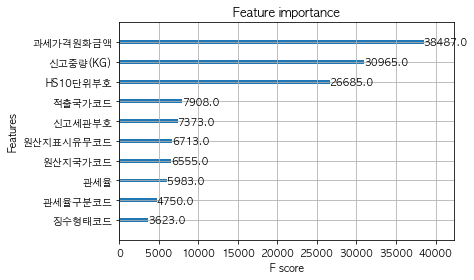

In [53]:
from xgboost import plot_importance

plot_importance(xgb_c)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

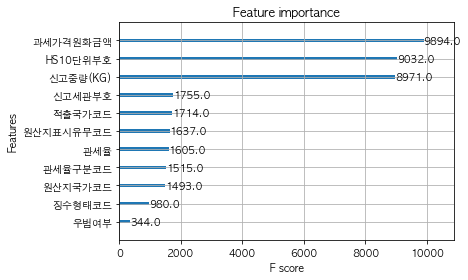

In [54]:
plot_importance(xgb_k)

In [55]:
# for var in ['신고중량(KG)', '과세가격원화금액']:
#     df_test[var] = df_test[var].apply(lambda x: np.log1p(x))
    
# df_test_encode = df_test.drop(['관세율', '신고중량(KG)', '과세가격원화금액'], axis=1)

# # encoder = LabelEncoder()

# # df_test_encode.loc[:,:].apply(encoder.fit_transform)
# df_test_encode.loc[:,:] = \
# df_test_encode.loc[:,:].apply(encoder.fit_transform)

# df_test_label = pd.concat([df_test_encode, df_test.loc[:,['관세율', '신고중량(KG)', '과세가격원화금액']]], axis=1)

In [56]:
# df_test_label

In [57]:
# df_test_label.info()

In [58]:
xgb_public_c_pred = xgb_c.predict(df_public_label)
collections.Counter(xgb_public_c_pred)

Counter({0: 6736, 1: 1398})

In [59]:
df_public_label['우범여부'] = xgb_public_c_pred

In [60]:
df_public_label

,신고세관부호,징수형태코드,HS10단위부호,적출국가코드,원산지국가코드,관세율구분코드,원산지표시유무코드,관세율,신고중량(KG),과세가격원화금액,우범여부
0,13,2,2190,15,19,18,1,7.2,6.804836,12.936260,0
1,6,2,786,37,19,18,1,0.0,5.993961,10.326170,0
2,9,5,1851,15,19,18,4,3.2,5.828946,7.867603,0
3,6,2,1736,15,19,0,1,13.0,3.433987,7.815611,0
4,4,2,3308,95,111,5,0,1.3,1.386294,11.363569,0
...,...,...,...,...,...,...,...,...,...,...,...
8129,13,2,1165,15,19,18,4,4.8,6.836259,10.921179,0
8130,9,2,948,50,55,1,4,6.5,8.599879,10.248388,0
8131,6,2,3234,47,55,0,2,8.0,4.548600,8.456179,0
8132,13,6,1685,64,74,10,1,0.0,6.576470,12.193305,0


In [61]:
xgb_public_k_pred = xgb_k.predict(df_public_label)
collections.Counter(xgb_public_k_pred)

Counter({0: 6736, 1: 1347, 2: 51})

In [62]:
df_public_label['핵심적발'] = xgb_public_k_pred

In [63]:
df_public_label

,신고세관부호,징수형태코드,HS10단위부호,적출국가코드,원산지국가코드,관세율구분코드,원산지표시유무코드,관세율,신고중량(KG),과세가격원화금액,우범여부,핵심적발
0,13,2,2190,15,19,18,1,7.2,6.804836,12.936260,0,0
1,6,2,786,37,19,18,1,0.0,5.993961,10.326170,0,0
2,9,5,1851,15,19,18,4,3.2,5.828946,7.867603,0,0
3,6,2,1736,15,19,0,1,13.0,3.433987,7.815611,0,0
4,4,2,3308,95,111,5,0,1.3,1.386294,11.363569,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8129,13,2,1165,15,19,18,4,4.8,6.836259,10.921179,0,0
8130,9,2,948,50,55,1,4,6.5,8.599879,10.248388,0,0
8131,6,2,3234,47,55,0,2,8.0,4.548600,8.456179,0,0
8132,13,6,1685,64,74,10,1,0.0,6.576470,12.193305,0,0


In [64]:
public_result['우범여부'] = xgb_public_c_pred
public_result['핵심적발'] = xgb_public_k_pred
public_result

,신고번호,우범여부,핵심적발
0,56839011,0,0
1,64859691,0,0
2,99950077,0,0
3,22601387,0,0
4,33240058,0,0
...,...,...,...
8129,95650431,0,0
8130,48093440,0,0
8131,12889495,0,0
8132,39908806,0,0


In [78]:
public_result.to_csv('비둘기.csv')

In [66]:
xgb_private_c_pred = xgb_c.predict(df_private_label)
collections.Counter(xgb_private_c_pred)

Counter({0: 6985, 1: 1496})

In [67]:
df_private_label['우범여부'] = xgb_private_c_pred

In [68]:
df_private_label

,신고세관부호,징수형태코드,HS10단위부호,적출국가코드,원산지국가코드,관세율구분코드,원산지표시유무코드,관세율,신고중량(KG),과세가격원화금액,우범여부
0,13,2,1154,46,91,0,2,8.0,0.693147,7.130659,0
1,6,2,2018,88,104,0,5,8.0,1.740466,7.219898,0
2,13,2,970,15,19,18,2,2.4,9.852247,13.916081,0
3,21,9,1075,15,19,1,2,6.5,5.620401,5.111988,0
4,13,2,3112,15,19,1,1,0.0,3.761200,11.643415,0
...,...,...,...,...,...,...,...,...,...,...,...
8476,13,6,2510,85,19,1,5,0.0,1.163151,4.992471,0
8477,13,2,3504,15,19,18,0,3.2,4.805659,8.254019,0
8478,10,2,81,15,19,18,5,12.0,9.973527,18.591333,0
8479,6,2,2838,15,19,1,0,0.0,3.273364,13.445947,0


In [69]:
xgb_private_k_pred = xgb_k.predict(df_private_label)
collections.Counter(xgb_private_k_pred)

Counter({0: 6985, 1: 1454, 2: 42})

In [70]:
df_private_label['핵심적발'] = xgb_private_k_pred

In [71]:
df_private_label

,신고세관부호,징수형태코드,HS10단위부호,적출국가코드,원산지국가코드,관세율구분코드,원산지표시유무코드,관세율,신고중량(KG),과세가격원화금액,우범여부,핵심적발
0,13,2,1154,46,91,0,2,8.0,0.693147,7.130659,0,0
1,6,2,2018,88,104,0,5,8.0,1.740466,7.219898,0,0
2,13,2,970,15,19,18,2,2.4,9.852247,13.916081,0,0
3,21,9,1075,15,19,1,2,6.5,5.620401,5.111988,0,0
4,13,2,3112,15,19,1,1,0.0,3.761200,11.643415,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8476,13,6,2510,85,19,1,5,0.0,1.163151,4.992471,0,0
8477,13,2,3504,15,19,18,0,3.2,4.805659,8.254019,0,0
8478,10,2,81,15,19,18,5,12.0,9.973527,18.591333,0,0
8479,6,2,2838,15,19,1,0,0.0,3.273364,13.445947,0,0


In [72]:
private_result['우범여부'] = xgb_private_c_pred
private_result['핵심적발'] = xgb_private_k_pred
private_result

,신고번호,우범여부,핵심적발
0,41256141,0,0
1,20889431,0,0
2,25403940,0,0
3,43489778,0,0
4,94895240,0,0
...,...,...,...
8476,25225594,0,0
8477,17739793,0,0
8478,70427265,0,0
8479,60306302,0,0


In [77]:
private_result.to_csv('비둘기.csv')

In [80]:
df_test = pd.read_csv('./비둘기(0804).csv')
df_test['우범여부']

collections.Counter(public_result['우범여부'] == df_test['우범여부'])

Counter({True: 7808, False: 326})

In [75]:
df_test['핵심적발'].value_counts()

0    6720
1    1371
2      43
Name: 핵심적발, dtype: int64

In [76]:
collections.Counter(xgb_public_k_pred)

Counter({0: 6736, 1: 1347, 2: 51})